## Notebook to generate AB-zeropoint mags for various filter-bands given set of photospheric temp, spot temp and fillfactor. Ultimately code was implemented in later notebooks.

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import fits
import pandas as pd
from IPython.display import set_matplotlib_formats

import HELP
get_model = HELP.get_model
make_spotmodel = HELP.make_spotmodel
Dotter_rad = HELP.Dotter_rad
MagConvert = HELP.MagConvert
V_VKPlotData = HELP.V_VKPlotData

import getMag
getMag = getMag.getMag

import getMag_hires
getMag_hires = getMag_hires.getMag_hires

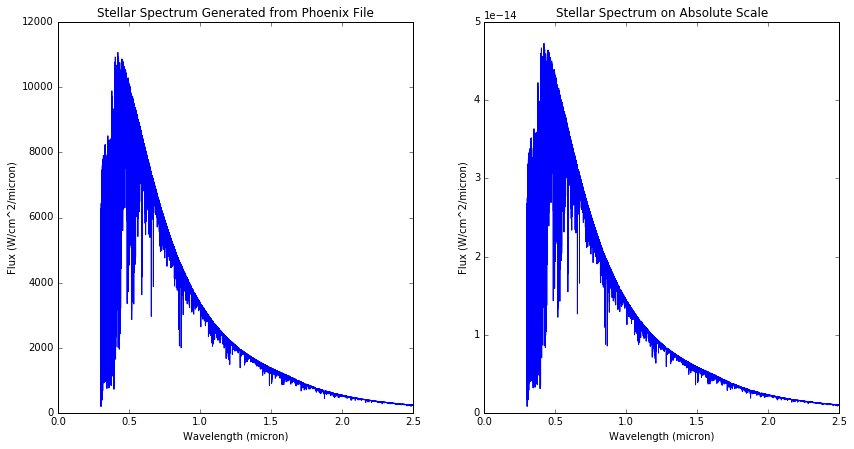

In [2]:
PhTemp = '5800'
SpTemp = '5800'
FillFactor = .2
wavelength,flux_Phoenix,PhTemp,SpTemp,FillFactor = make_spotmodel(PhTemp,SpTemp,FillFactor) #Creates spectrum for desired temps and fill-factor
Flux = Dotter_rad( PhTemp, flux_Phoenix )

plt.figure(figsize = (14,7))
plt.subplot(121)
plt.plot(wavelength,flux_Phoenix)
plt.title('Stellar Spectrum Generated from Phoenix File')
plt.xlabel('Wavelength (micron)')
plt.ylabel(r'Flux (W/cm^2/micron)')

plt.subplot(122)
plt.plot(wavelength,Flux)
plt.title('Stellar Spectrum on Absolute Scale')
plt.xlabel('Wavelength (micron)')
plt.ylabel(r'Flux (W/cm^2/micron)')

[('U', 0.365, 5.759067669770582), ('B', 0.445, 5.6207500916502093), ('V', 0.551, 4.9873442775360353), ('R', 0.658, 4.665521066171797), ('I', 0.806, 4.364428519598337), ('J', 1.235, 3.8523143669529549), ('H', 1.662, 3.5336828281312349), ('Ks', 2.159, 3.4734758714095282), ('u', 0.356, 6.5404408410765154), ('g', 0.483, 5.2083699635717862), ('r', 0.626, 4.8238891349299191), ('i', 0.767, 4.7122876096853039), ('z', 0.91, 4.7081903321277174)]
[6.5404408410765154, 6.5490676697705821, 5.5307500916502095, 5.2083699635717862, 5.0073442775360348, 4.8238891349299191, 4.8755210661717969, 4.7122876096853039, 4.8144285195983372, 4.7081903321277174, 4.7623143669529551, 4.923682828131235, 5.3234758714095278]


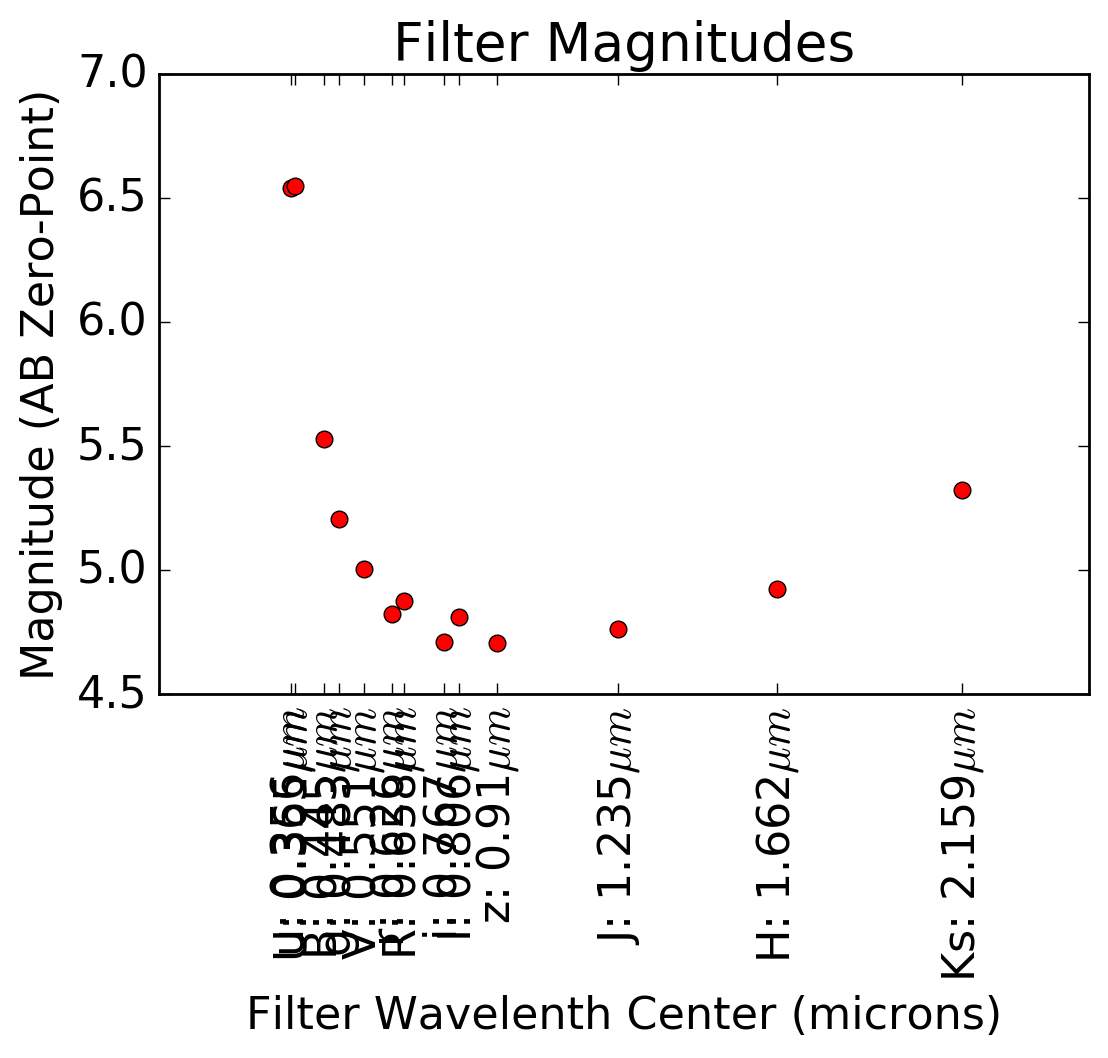

In [3]:
#initialize arrays of filter names
bands = np.array(['U','B','V','R','I','J','H','Ks','u','g','r','i','z'])


#fill up a 3D array 'syn_phot' with: filter name, center point, magnitude
syn_phot = []
for i in range(len(bands)):
    x = getMag(bands[i],wavelength,Flux,'microns') #x returns three values; band, center, mag
    syn_phot.append(x)

print(syn_phot)

Filters, Centers, Magnitudes = MagConvert(syn_phot)

print(Magnitudes)

plt.tight_layout
plt.plot(Centers,Magnitudes,'ro')
plt.title('Filter Magnitudes')

strCenters = [str(i) for i in Centers]
xlab = [Filters[i]+': '+strCenters[i]+'$\mu m$' for i in range(len(Filters))]

plt.xticks(Centers,xlab,rotation='vertical')
plt.xlabel('Filter Wavelenth Center (microns)')
plt.ylabel('Magnitude (AB Zero-Point)')

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
mpl.rcParams['xtick.direction'] ='out'
mpl.rcParams['ytick.direction'] = 'out'

[('U', 0.365, 5.7389142238275204), ('B', 0.445, 5.6829617052359547), ('V', 0.551, 4.9918828112846576), ('R', 0.658, 4.6646198030383612), ('I', 0.806, 4.3630240871349528), ('J', 1.235, 3.87014333711726), ('H', 1.662, 3.5091529490389242), ('Ks', 2.159, 3.4575141270649707), ('u', 0.356, 6.5557443074153818), ('g', 0.483, 5.2481289982821133), ('r', 0.626, 4.8065518017234439), ('i', 0.767, 4.6752489605627554), ('z', 0.91, 4.5174439869221459)]
[6.5557443074153818, 6.5289142238275204, 5.5929617052359548, 5.2481289982821133, 5.0118828112846572, 4.8065518017234439, 4.8746198030383612, 4.6752489605627554, 4.813024087134953, 4.5174439869221459, 4.7801433371172601, 4.8991529490389238, 5.3075141270649713]


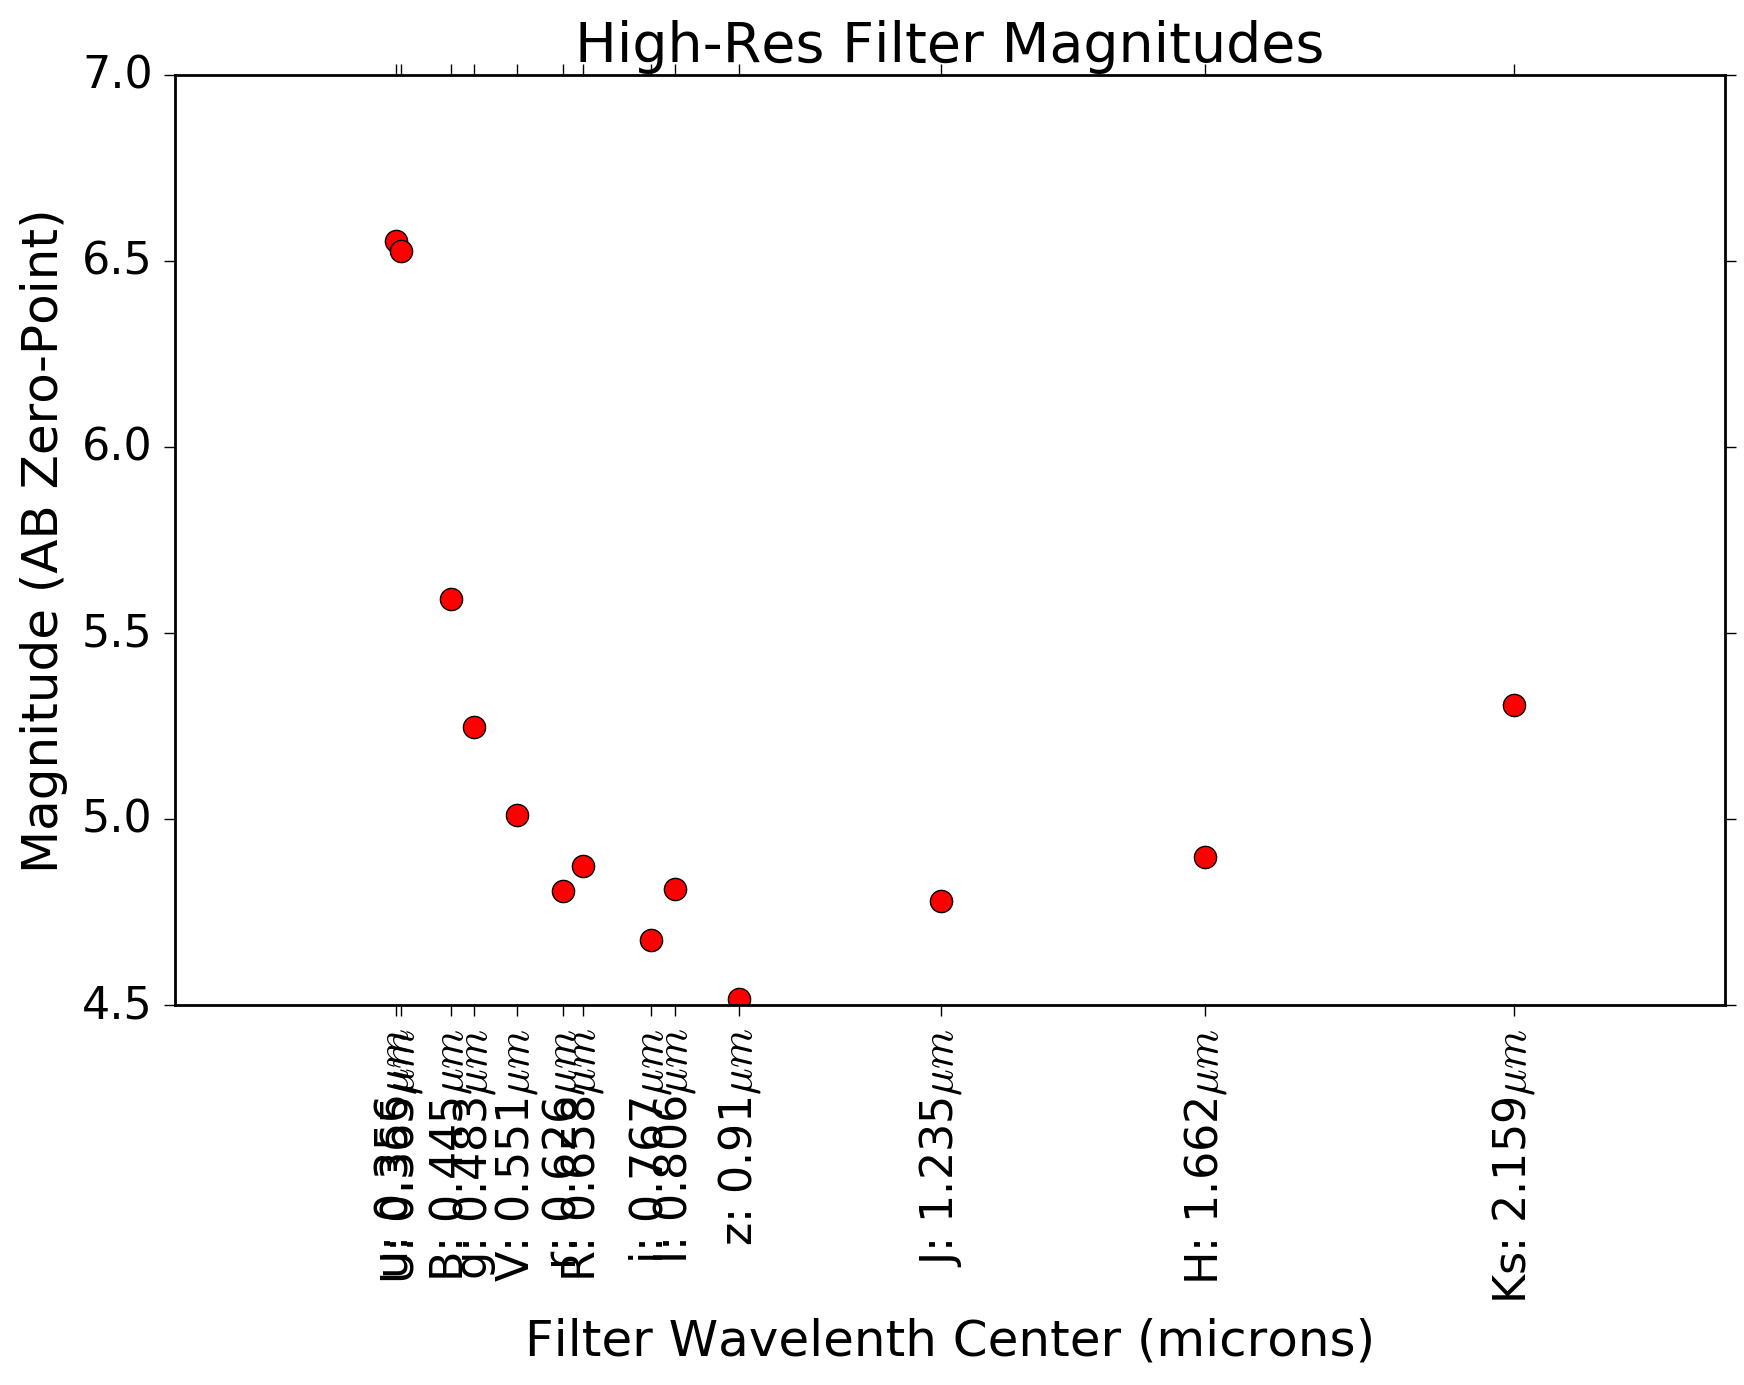

In [4]:
#initialize arrays of filter names
bands = np.array(['U','B','V','R','I','J','H','Ks','u','g','r','i','z'])


#fill up a 3D array 'syn_phot' with: filter name, center point, magnitude
syn_phot = []
for i in range(len(bands)):
    x = getMag_hires(bands[i],wavelength,Flux,'microns') #x returns three values; band, center, mag
    syn_phot.append(x)

print(syn_phot)

Filters, Centers, Magnitudes = MagConvert(syn_phot)

print(Magnitudes)

plt.tight_layout
plt.plot(Centers,Magnitudes,'ro')
plt.title('High-Res Filter Magnitudes')

strCenters = [str(i) for i in Centers]
xlab = [Filters[i]+': '+strCenters[i]+'$\mu m$' for i in range(len(Filters))]

plt.xticks(Centers,xlab,rotation='vertical')
plt.xlabel('Filter Wavelenth Center (microns)')
plt.ylabel('Magnitude (AB Zero-Point)')

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
mpl.rcParams['xtick.direction'] ='out'
mpl.rcParams['ytick.direction'] = 'out'

In [5]:
PhMax = 7000
PhMin = 3000
SpTempFrac = np.arange(0.75,1.04,0.05)
FillFactor = 0.3  #np.arange(0,0.301,0.03)

Vmags = []
VKmags = []
for i in range(len(SpTempFrac)):
    x = V_VKPlotData(PhMax,PhMin,SpTempFrac[i],FillFactor)
    Vmags.append(x[0])
    VKmags.append(x[1])
#Vmags and VKmags filled with sets of magnitudes over photospheric temperature range. Sets follow range of
#spot temperature as a fraction of photospheric temperature


C:\Users\Nick\Anaconda3\lib\site-packages\matplotlib\cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


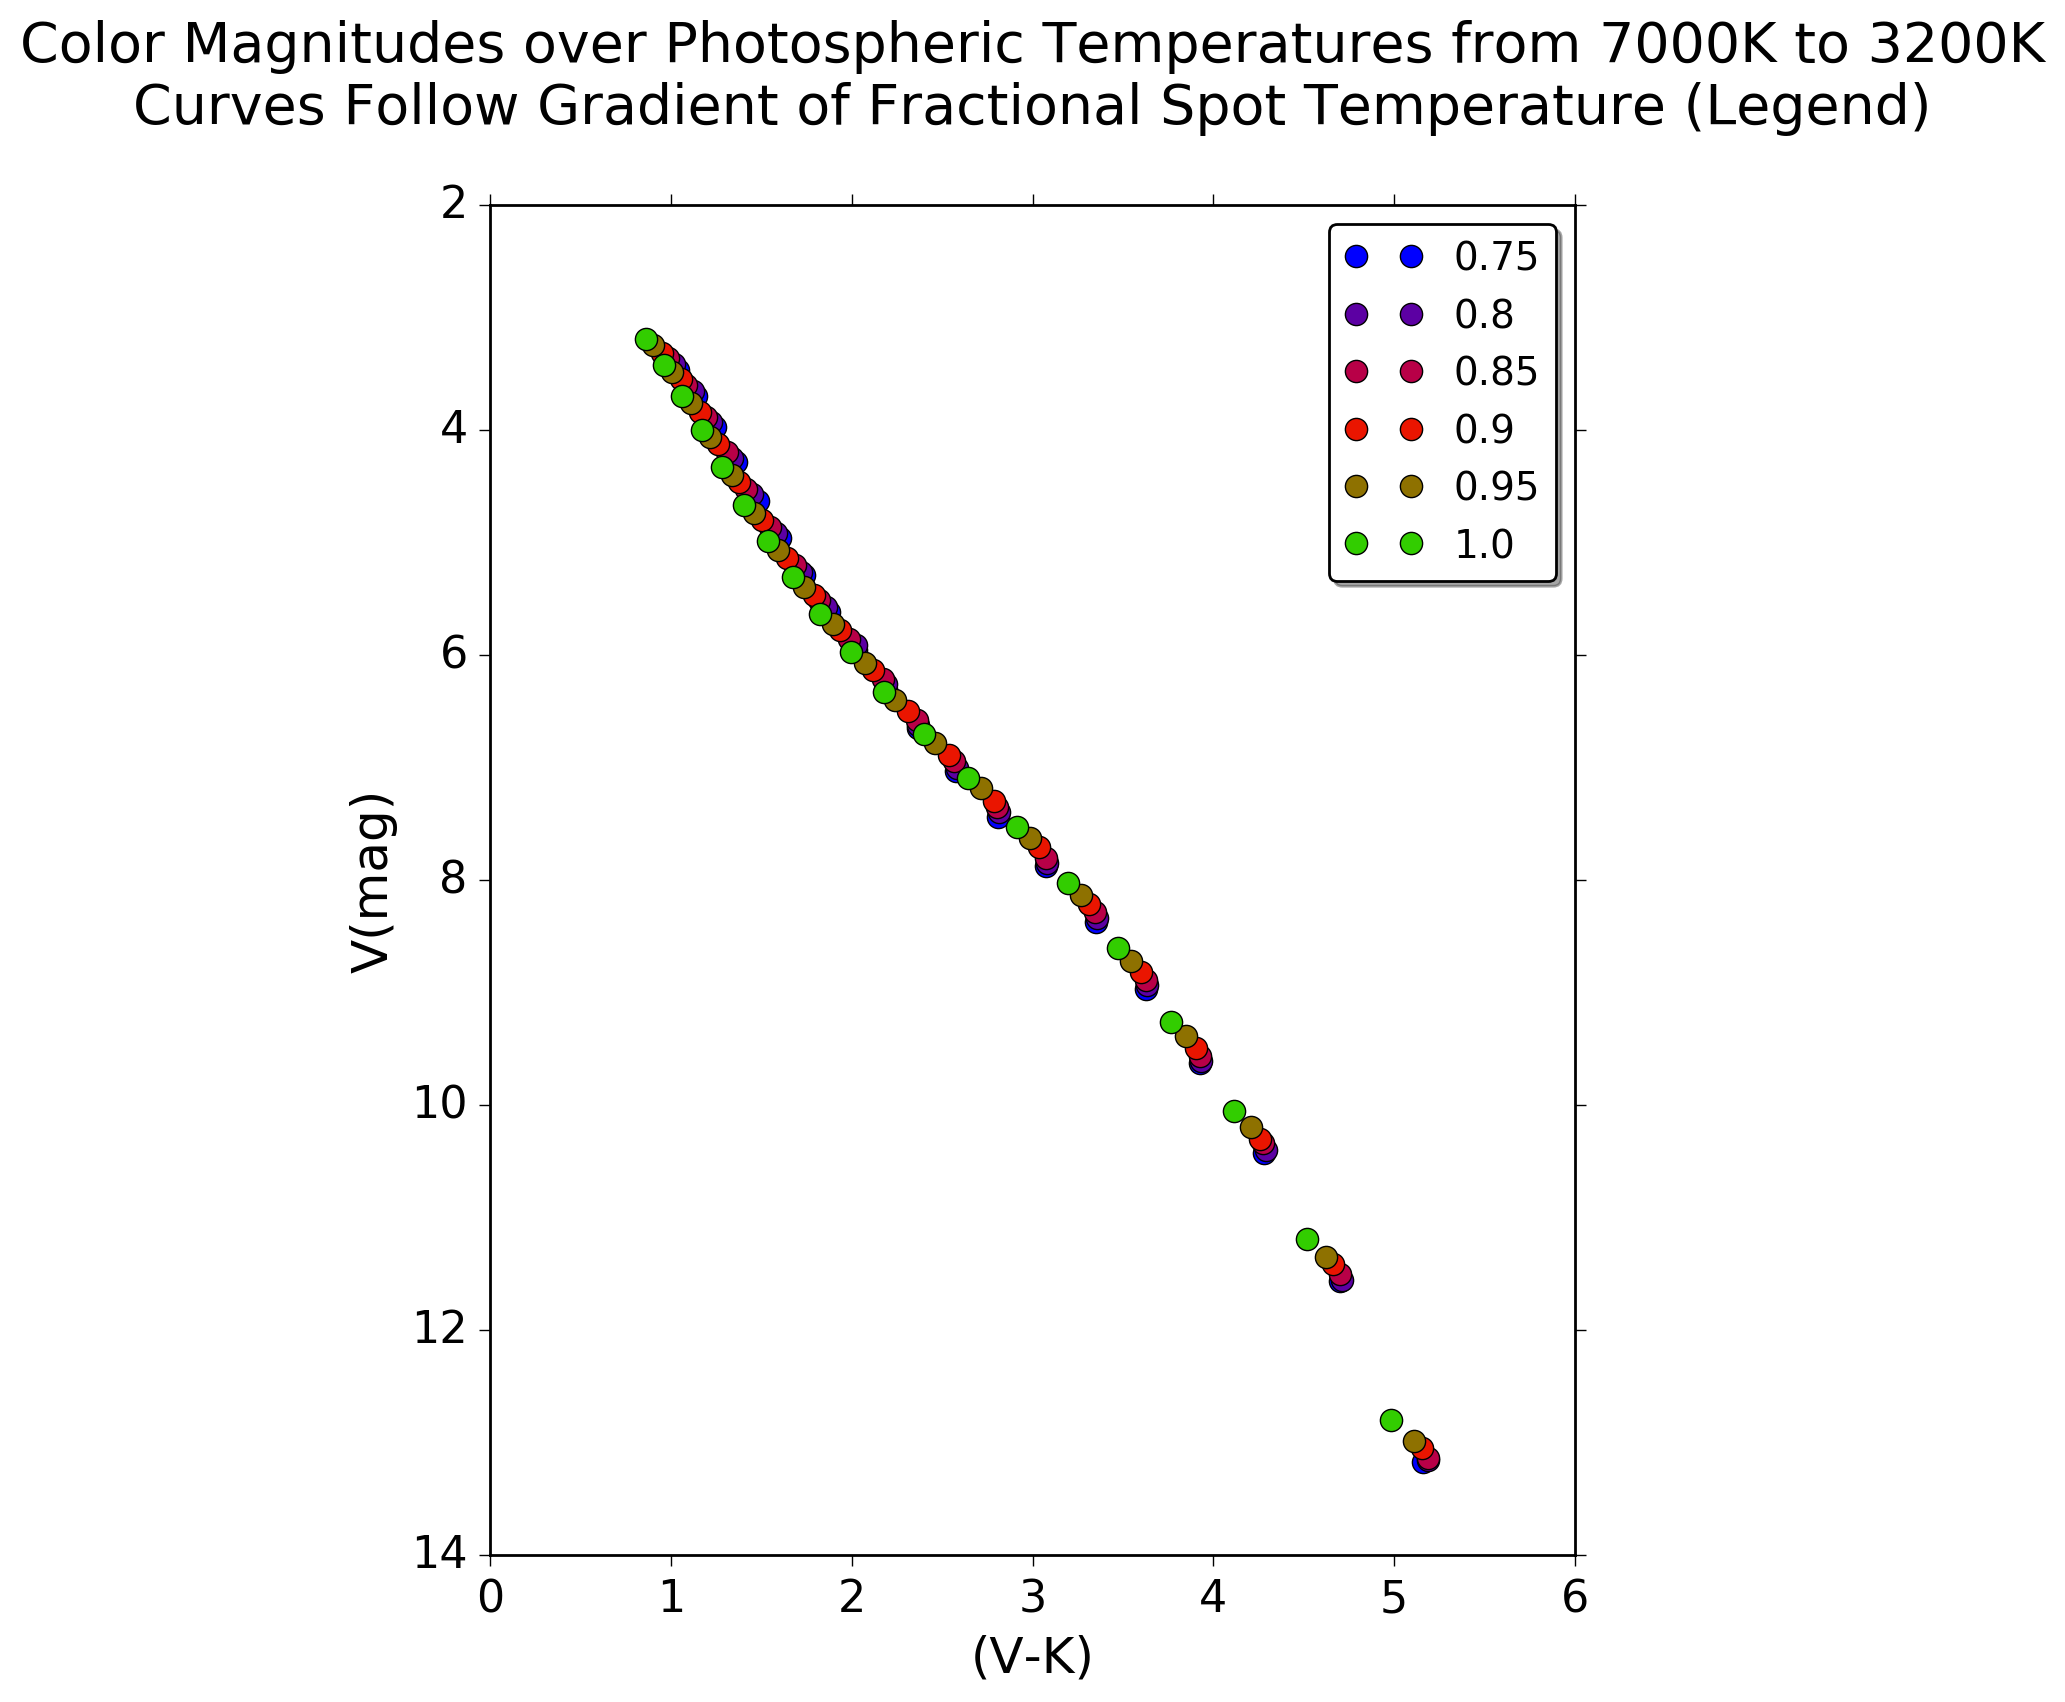

In [6]:
plt.figure(figsize=(7,10))
colormap = plt.cm.brg
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0,0.9,6)])


for i in range(len(SpTempFrac)):
    plt.plot(VKmags[i],Vmags[i],'o')


plt.tight_layout
plt.gca().invert_yaxis()
plt.subplots_adjust(top=0.8)

plt.legend(SpTempFrac,fancybox=True,shadow=True)
plt.xlabel('(V-K)')
plt.ylabel('V(mag)')
plt.title('Color Magnitudes over Photospheric Temperatures from 7000K to 3200K\nCurves Follow Gradient of Fractional Spot Temperature (Legend)',y=1.05)
plt.savefig('ColorMagsDots.jpg')

In [7]:
SpTempFrac = np.arange(0.75,1.04,0.05)
print(len(SpTempFrac))


6
